In [9]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [10]:
df = pd.read_csv("Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1476,1477,15703399,McNeil,756,France,Female,26,5,101641.14,2,0,1,154460.68,0
7836,7837,15780492,Ignatyeva,648,France,Male,42,4,0.00,2,1,0,19283.14,0
1892,1893,15773487,Conway,634,Germany,Female,31,8,76798.92,1,0,0,196021.73,0
9253,9254,15667321,Cocci,644,Spain,Male,49,10,0.00,2,1,1,145089.64,0
293,294,15590241,Chuang,750,Spain,Female,34,9,112822.26,1,0,0,150401.53,1


In [11]:
df.drop(['RowNumber','CustomerId','Surname'],axis='columns',inplace=True)
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

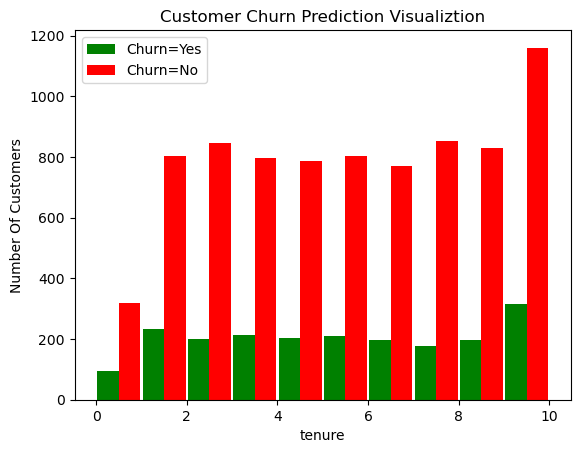

In [14]:
df1 = df.copy()

tenure_exited_no = df1[df1.Exited==0].Tenure
tenure_exited_yes = df1[df1.Exited==1].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_exited_yes, tenure_exited_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()
plt.show()

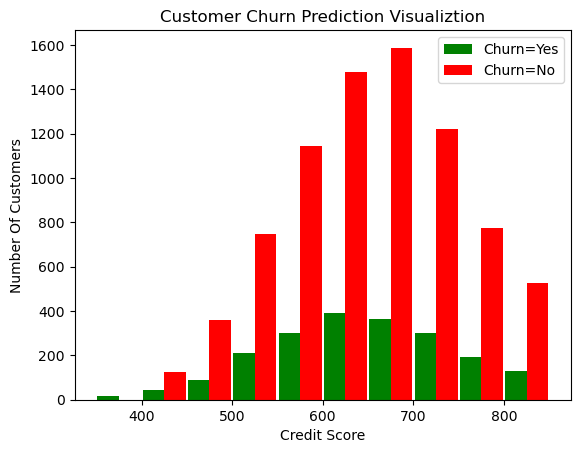

In [17]:
cr_churn_no = df1[df1.Exited==0].CreditScore      
cr_churn_yes = df1[df1.Exited==1].CreditScore      

plt.xlabel("Credit Score")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([cr_churn_yes, cr_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()
plt.show()

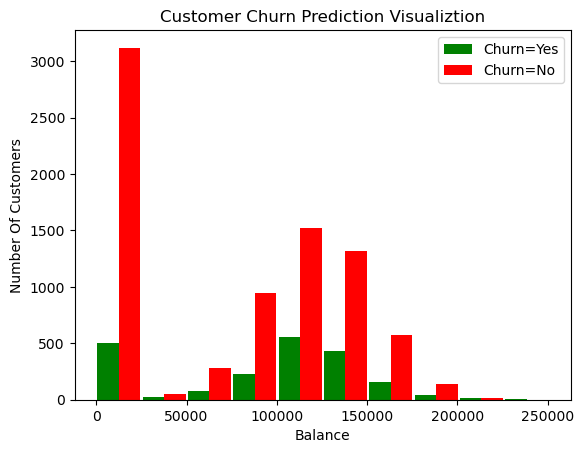

In [18]:
b_churn_no = df1[df1.Exited==0].Balance      
b_churn_yes = df1[df1.Exited==1].Balance      

plt.xlabel("Balance")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([b_churn_yes, b_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()
plt.show()

In [19]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [20]:
print_unique_col_values(df1)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [23]:
df1['Gender'].replace({'Male': 1,'Female': 0},inplace=True)

C:\Users\OM\AppData\Local\Temp\ipykernel_10644\3233963162.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Gender'].replace({'Male': 1,'Female': 0},inplace=True)
C:\Users\OM\AppData\Local\Temp\ipykernel_10644\3233963162.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Gender'].replac

In [26]:
df1.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7836,648,France,1,42,4,0.00,2,1,0,19283.14,0
8585,754,France,0,45,6,0.00,1,1,0,73881.68,1
8853,681,France,1,43,3,66338.68,1,1,1,18772.50,1
4637,758,France,0,30,3,141581.08,1,1,0,156249.06,0
7406,489,Spain,1,58,4,0.00,2,1,1,191419.32,0


In [27]:
df2 = df1.copy()

df2 = pd.get_dummies(data=df1, columns=['Geography']).astype(int)
df2.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [28]:
df2.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
4930,627,1,30,6,112372,1,1,1,118029,0,0,1,0
9169,766,0,45,6,0,2,0,0,147184,0,1,0,0
4049,618,1,33,4,0,2,1,1,77550,0,0,0,1
7759,549,0,55,1,137592,2,0,1,116548,1,0,1,0
4365,501,0,40,2,0,2,0,0,141946,0,1,0,0


In [29]:
df2.dtypes

CreditScore          int32
Gender               int32
Age                  int32
Tenure               int32
Balance              int32
NumOfProducts        int32
HasCrCard            int32
IsActiveMember       int32
EstimatedSalary      int32
Exited               int32
Geography_France     int32
Geography_Germany    int32
Geography_Spain      int32
dtype: object

In [30]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [31]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [32]:
X = df2.drop('Exited',axis='columns')
y = df2['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [33]:
X_train.shape,X_test.shape

((8000, 12), (2000, 12))

In [34]:
X_train[:10]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
7751,0.800,0,0.283784,0.6,0.000000,0.333333,0,0,0.096274,0,0,1
4154,0.752,1,0.216216,0.3,0.000000,0.333333,1,0,0.981478,1,0,0
3881,0.476,0,0.621622,0.3,0.000000,0.000000,1,1,0.948550,1,0,0
9238,0.846,0,0.432432,0.4,0.000000,0.333333,1,0,0.646866,1,0,0
5210,0.402,1,0.229730,0.7,0.517011,0.333333,0,0,0.434671,1,0,0
7487,0.602,0,0.513514,0.4,0.000000,0.000000,0,0,0.421900,1,0,0
7542,0.314,0,0.216216,0.4,0.000000,0.333333,1,1,0.303414,0,0,1
7524,0.620,0,0.297297,0.8,0.666331,0.000000,1,1,0.925813,1,0,0
9412,0.750,1,0.108108,0.6,0.393323,0.000000,0,0,0.668609,1,0,0
6377,0.684,1,0.202703,0.9,0.000000,0.000000,1,0,0.567524,1,0,0


In [35]:
len(X_train.columns)

12

# Build a model (ANN) in tensorflow/keras

In [43]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100


D:\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7883 - loss: 0.5335
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7973 - loss: 0.4715
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8056 - loss: 0.4592
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8176 - loss: 0.4375
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8124 - loss: 0.4395
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8209 - loss: 0.4271
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8118 - loss: 0.4386
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8192 - loss: 0.4268
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8313 - loss: 0.4117
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8143 - loss: 0.4237
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8267 - loss: 0.4107
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [44]:
model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8351 - loss: 0.3660


[0.3590090572834015, 0.8429999947547913]

In [45]:
yp = model.predict(X_test)
yp[:5]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.04377541],
       [0.11342263],
       [0.10661459],
       [0.12262311],
       [0.10613021]], dtype=float32)

In [46]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [47]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 1, 0, 1]

In [48]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int32

In [49]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1595
           1       0.63      0.54      0.58       405

    accuracy                           0.84      2000
   macro avg       0.76      0.73      0.74      2000
weighted avg       0.84      0.84      0.84      2000



In [50]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(95.72222222222221, 0.5, 'Truth')

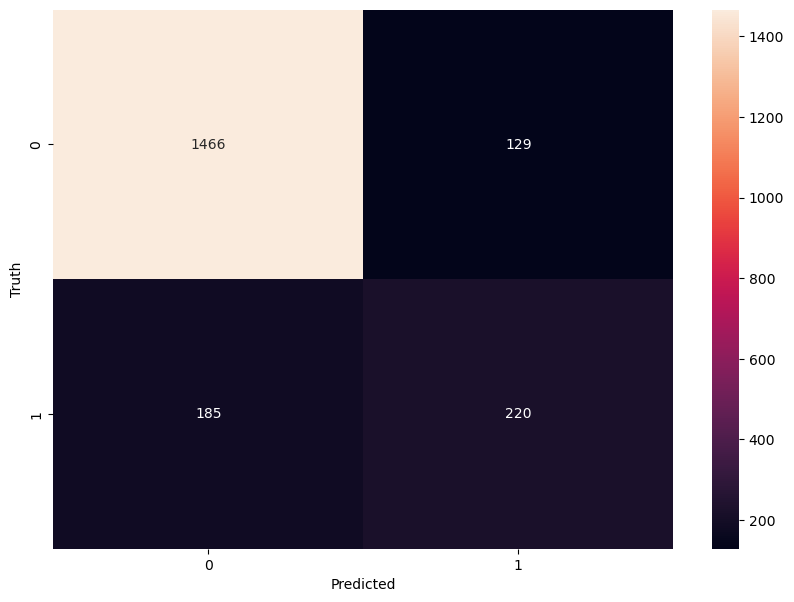

In [51]:
plt.show()

In [52]:
y_test.shape

(2000,)